In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import folium
from folium import plugins
import ipywidgets
import geocoder
import geopy

import math

# Sklearn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor








In [3]:
day=pd.read_csv("/./Users/Yanaorfin/Documents/Academy/CapitalBikeShare/DataSet/Bike-Sharing-Dataset/day.csv",parse_dates=["dteday"])
hour=pd.read_csv("/./Users/Yanaorfin/Documents/Academy/CapitalBikeShare/DataSet/Bike-Sharing-Dataset/hour.csv",parse_dates=["dteday"])
trips_2011=pd.read_csv("/./Users/Yanaorfin/Documents/Academy/CapitalBikeShare/DataSet/2011-capitalbikeshare-tripdata.csv",parse_dates=["Start date","End date"])
station_loc=pd.read_csv("/./Users/Yanaorfin/Documents/Academy/CapitalBikeShare/DataSet/Capital_Bike_Share_Locations_updated2.csv",delimiter=";")

In [4]:
station_loc=station_loc.iloc[:,0:9]

In [5]:
station_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X               697 non-null    float64
 1   Y               697 non-null    float64
 2   OBJECTID        691 non-null    float64
 3   LATITUDE        697 non-null    float64
 4   LONGITUDE       697 non-null    float64
 5   NAME            697 non-null    object 
 6   STATION_TYPE    695 non-null    object 
 7   STATION_ID      690 non-null    float64
 8   STATION_STATUS  690 non-null    object 
dtypes: float64(6), object(3)
memory usage: 49.1+ KB


In [6]:
# Bike trips 2012
files_2012=glob.glob("/Users/Yanaorfin/Documents/Academy/CapitalBikeShare/DataSet/2012-capitalbikeshare-tripdata/*.csv")
trips_2012=pd.DataFrame()
for file in files_2012:
    data=pd.read_csv(file,parse_dates=["Start date","End date"])
    data["filename"]=file
    trips_2012=pd.concat([trips_2012,data])


In [7]:
trips=trips_2011.append(trips_2012)

/var/folders/bn/ghpvp69d0vd0t7sb_kbnxzqw0000gn/T/ipykernel_33860/2382772095.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips=trips_2011.append(trips_2012)


In [8]:
trips.shape

(3255678, 10)

In [9]:
day.shape

(731, 16)

In [10]:
day.info()
day.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
hour.shape

(17379, 17)

In [12]:
hour.info()
hour.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [15]:
hour.loc[hour["season"]==1,"season_name"]="Winter"
hour.loc[hour["season"]==2,"season_name"]="Spring"
hour.loc[hour["season"]==3,"season_name"]="Summer"
hour.loc[hour["season"]==4,"season_name"]="Fall"

day.loc[day["season"]==1,"season_name"]="Winter"
day.loc[day["season"]==2,"season_name"]="Spring"
day.loc[day["season"]==3,"season_name"]="Summer"
day.loc[day["season"]==4,"season_name"]="Fall"


In [16]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255678 entries, 0 to 566831
Data columns (total 10 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              int64         
 1   Start date            datetime64[ns]
 2   End date              datetime64[ns]
 3   Start station number  int64         
 4   Start station         object        
 5   End station number    int64         
 6   End station           object        
 7   Bike number           object        
 8   Member type           object        
 9   filename              object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 273.2+ MB


In [17]:
trips.isna().sum()

Duration                      0
Start date                    0
End date                      0
Start station number          0
Start station                 0
End station number            0
End station                   0
Bike number                   0
Member type                   0
filename                1226767
dtype: int64

In [18]:
trips.isnull().sum()

Duration                      0
Start date                    0
End date                      0
Start station number          0
Start station                 0
End station number            0
End station                   0
Bike number                   0
Member type                   0
filename                1226767
dtype: int64

In [19]:
trips.drop(columns=["filename"],inplace=True)


DATE TIME

In [20]:
pd.to_datetime(hour["dteday"])

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, Length: 17379, dtype: datetime64[ns]

In [21]:
pd.to_datetime(trips["Start date"])
pd.to_datetime(trips["End date"])

0        2011-01-01 01:00:37
1        2011-01-01 00:08:32
2        2011-01-01 00:15:36
3        2011-01-01 00:16:36
4        2011-01-01 00:32:19
                 ...        
566827   2012-07-01 00:00:52
566828   2012-07-01 00:21:18
566829   2012-07-01 00:06:19
566830   2012-07-01 00:15:21
566831   2012-07-01 00:10:18
Name: End date, Length: 3255678, dtype: datetime64[ns]

In [22]:
trips["mnth"]=pd.DatetimeIndex(trips["Start date"]).month
trips["weekday"]=pd.DatetimeIndex(trips["Start date"]).weekday
trips["dteday"]=pd.DatetimeIndex(trips["Start date"]).date
trips["hour"]=trips["Start date"].dt.hour


In [23]:
# Day time
# Trips data set
trips["day_time"]=trips["hour"]

trips["day_time"]=np.where((trips["hour"]>=0)&(trips["hour"]<5),"Night",trips["day_time"])
trips["day_time"]=np.where((trips["hour"]>=5)&(trips["hour"]<7),"Early morning",trips["day_time"])
trips["day_time"]=np.where((trips["hour"]>=7)&(trips["hour"]<12),"Morning",trips["day_time"])
trips["day_time"]=np.where((trips["hour"]>=12)&(trips["hour"]<17),"Afternoon",trips["day_time"])
trips["day_time"]=np.where((trips["hour"]>=17)&(trips["hour"]<21),"Evening",trips["day_time"])
trips["day_time"]=np.where((trips["hour"]>=21)&(trips["hour"]<24),"Night",trips["day_time"])


# Hour data set

hour["day_time"]=hour["hr"]

hour["day_time"]=np.where((hour["hr"]>=0)&(hour["hr"]<5),"Night",hour["day_time"])
hour["day_time"]=np.where((hour["hr"]>=5)&(hour["hr"]<7),"Early morning",hour["day_time"])
hour["day_time"]=np.where((hour["hr"]>=7)&(hour["hr"]<12),"Morning",hour["day_time"])
hour["day_time"]=np.where((hour["hr"]>=12)&(hour["hr"]<17),"Afternoon",hour["day_time"])
hour["day_time"]=np.where((hour["hr"]>=17)&(hour["hr"]<21),"Evening",hour["day_time"])
hour["day_time"]=np.where((hour["hr"]>=21)&(hour["hr"]<24),"Night",hour["day_time"])


In [24]:
trips["dteday"]=pd.to_datetime(trips["dteday"])

In [25]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255678 entries, 0 to 566831
Data columns (total 14 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              int64         
 1   Start date            datetime64[ns]
 2   End date              datetime64[ns]
 3   Start station number  int64         
 4   Start station         object        
 5   End station number    int64         
 6   End station           object        
 7   Bike number           object        
 8   Member type           object        
 9   mnth                  int64         
 10  weekday               int64         
 11  dteday                datetime64[ns]
 12  hour                  int64         
 13  day_time              object        
dtypes: datetime64[ns](3), int64(6), object(5)
memory usage: 372.6+ MB


In [26]:

# HOUR DF
hour["season_name"]=pd.Categorical(hour["season_name"],categories=("Winter","Spring","Summer","Fall"))
hour["is_holiday"]=hour["holiday"]
hour.loc[hour["is_holiday"]==1,"is_holiday"]="Yes"
hour.loc[hour["is_holiday"]==0,"is_holiday"]="No"
hour["is_holiday"]=pd.Categorical(hour["is_holiday"],categories=("Yes","No"))

#DAY DF

day["season_name"]=pd.Categorical(day["season_name"],categories=("Winter","Spring","Summer","Fall"))
day["is_holiday"]=day["holiday"]
day.loc[day["is_holiday"]==1,"is_holiday"]="Yes"
day.loc[day["is_holiday"]==0,"is_holiday"]="No"
day["is_holiday"]=pd.Categorical(day["is_holiday"],categories=("Yes","No"))


#TRIPS DF

trips["season"]=trips["mnth"]
trips["season_name"]=trips["season"]
trips["season_name"].replace({1:"Winter",2:"Winter",3:"Spring",4:"Spring",5:"Spring",6:"Summer",7:"Summer",8:"Summer",9:"Fall",10:"Fall",11:"Fall",12:"Winter"},inplace=True)
trips["season_name"]=pd.Categorical(trips["season_name"],categories=("Winter","Spring","Summer","Fall"))


In [27]:
# Normalised values to meaningful values

# HOUR DF
hour["tem_cel"]=np.ceil(hour["temp"]*47-8).astype(int)
hour["atemp_cel"]=np.ceil(hour["temp"]*66-16).astype(int)
hour["windspeed_"]=np.ceil(hour["windspeed"]*67).astype(int)

# DAY DF
day["tem_cel"]=np.ceil(day["temp"]*47-8).astype(int)
day["atemp_cel"]=np.ceil(day["temp"]*66-16).astype(int)
day["windspeed_"]=np.ceil(day["windspeed"]*67).astype(int)


In [28]:
#weekday name

hour["day_name"]=hour["weekday"]
hour["day_name"].replace({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"},inplace=True)
trips["day_name"]=trips["weekday"]
trips["day_name"].replace({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"},inplace=True)

In [29]:
# Holiday colummn for "Trips" dataset
holiday_list=day[["dteday","holiday","is_holiday"]]
trips=pd.merge(trips,holiday_list,on="dteday",how="left")

In [30]:
trips.loc[trips["Member type"]=="Member","Member type"]="registered"
trips.loc[trips["Member type"]=="Casual","Member type"]="casual"

In [31]:
trips["route"]=trips["Start station"]+" - "+trips["End station"]

In [32]:
# Replace Unknown memeber type (<1%)
trips["Member type"].replace({"Unknown":"casual"},inplace=True)

In [33]:
trips.head(5)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,mnth,weekday,dteday,hour,day_time,season,season_name,day_name,holiday,is_holiday,route
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,registered,1,5,2011-01-01,0,Night,1,Winter,Fri,0,No,5th & F St NW - 5th & F St NW
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,casual,1,5,2011-01-01,0,Night,1,Winter,Fri,0,No,14th & Harvard St NW - 14th & V St NW
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,registered,1,5,2011-01-01,0,Night,1,Winter,Fri,0,No,Georgia & New Hampshire Ave NW - Adams Mill & ...
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,registered,1,5,2011-01-01,0,Night,1,Winter,Fri,0,No,10th & U St NW - Florida Ave & R St NW
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,casual,1,5,2011-01-01,0,Night,1,Winter,Fri,0,No,Adams Mill & Columbia Rd NW - Calvert & Biltmo...


In [34]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,tem_cel,atemp_cel,windspeed_
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,15.872375,17.280166,13.239945
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,9.033183,12.696745,8.269943
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.000000,-14.000000,0.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,8.000000,7.000000,8.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,16.000000,17.000000,13.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,24.000000,28.000000,17.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,39.000000,50.000000,57.000000


In [35]:
trips.describe()

,Duration,Start station number,End station number,mnth,weekday,hour,season,holiday
count,3.255678e+06,3.255678e+06,3.255678e+06,3.255678e+06,3.255678e+06,3.255678e+06,3.255678e+06,3.255678e+06
mean,1.084497e+03,3.128974e+04,3.129182e+04,6.936537e+00,2.998742e+00,1.415391e+01,6.936537e+00,2.382514e-02
std,2.100267e+03,1.931212e+02,1.923761e+02,3.037865e+00,1.974851e+00,5.033927e+00,3.037865e+00,1.525041e-01
min,6.000000e+01,3.100000e+04,3.100000e+04,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,3.990000e+02,3.120000e+04,3.120100e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,0.000000e+00
50%,6.580000e+02,3.122600e+04,3.122500e+04,7.000000e+00,3.000000e+00,1.500000e+01,7.000000e+00,0.000000e+00
75%,1.092000e+03,3.140100e+04,3.140200e+04,9.000000e+00,5.000000e+00,1.800000e+01,9.000000e+00,0.000000e+00
max,8.635500e+04,3.180600e+04,3.180600e+04,1.200000e+01,6.000000e+00,2.300000e+01,1.200000e+01,1.000000e+00


In [36]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255678 entries, 0 to 3255677
Data columns (total 20 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              int64         
 1   Start date            datetime64[ns]
 2   End date              datetime64[ns]
 3   Start station number  int64         
 4   Start station         object        
 5   End station number    int64         
 6   End station           object        
 7   Bike number           object        
 8   Member type           object        
 9   mnth                  int64         
 10  weekday               int64         
 11  dteday                datetime64[ns]
 12  hour                  int64         
 13  day_time              object        
 14  season                int64         
 15  season_name           category      
 16  day_name              object        
 17  holiday               int64         
 18  is_holiday            category      
 19  

In [37]:
# Weather score
hour["hum_score"]=hour["hum"]
hour["temp_score"]=hour["tem_cel"]
hour["wind_score"]=hour["windspeed_"]


hour["hum_score"]=np.where(hour["hum_score"]>=0.78,4,hour["hum_score"])
hour["hum_score"]=np.where((hour["hum_score"]>=0.63)&(hour["hum_score"]<0.78),3,hour["hum_score"])
hour["hum_score"]=np.where((hour["hum_score"]>=0.48)&(hour["hum_score"]<0.63),2,hour["hum_score"])
hour["hum_score"]=np.where(hour["hum_score"]<0.48,1,hour["hum_score"])


hour["temp_score"]=np.where((hour["temp_score"]>=0)&(hour["temp_score"]<10),3,hour["temp_score"])
hour["temp_score"]=np.where((hour["temp_score"]>=10)&(hour["temp_score"]<16),2,hour["temp_score"])
hour["temp_score"]=np.where((hour["temp_score"]>=25)&(hour["temp_score"]<30),2,hour["temp_score"])
hour["temp_score"]=np.where((hour["temp_score"]>=16)&(hour["temp_score"]<25),1,hour["temp_score"])
hour["temp_score"]=np.where(hour["temp_score"]>=30,4,hour["temp_score"])
hour["temp_score"]=np.where(hour["temp_score"]<0,4,hour["temp_score"])


hour["wind_score"]=np.where((hour["wind_score"]>=0)&(hour["wind_score"]<13),1,hour["wind_score"])
hour["wind_score"]=np.where((hour["wind_score"]>=13)&(hour["wind_score"]<25),2,hour["wind_score"])
hour["wind_score"]=np.where((hour["wind_score"]>=25)&(hour["wind_score"]<39),3,hour["wind_score"])
hour["wind_score"]=np.where((hour["wind_score"]>=39),4,hour["wind_score"])

hour["weather_score"]=((hour["temp_score"]*0.4)+(hour["hum_score"]*0.3)+(hour["wind_score"]*0.1)+(hour["weathersit"]*0.2))


EDA (HOUR DF)

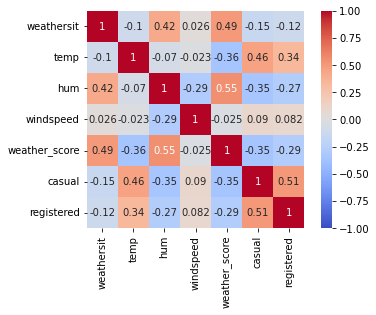

In [38]:

weather=hour[["weathersit","temp","hum","windspeed","weather_score","casual","registered"]].copy()

matrix_weather=weather.corr()

sns.heatmap(data=matrix_weather,cmap="coolwarm",vmin=-1,vmax=1,robust=True,square=True,annot=True )
plt.show()

In [39]:
hours_melt=pd.melt(hour,id_vars=["instant","dteday","day_name","season","yr","mnth","hr","holiday","weekday","workingday","weathersit","tem_cel","atemp_cel","hum","windspeed_","is_holiday","weather_score","day_time"],value_vars=["casual","registered"])

Fix misspel

In [40]:
#Fix misspel in Station name
trips.loc[trips["Start station number"]==31619,"Start station"]="Lincoln Park / 13th & East Capitol St NE"


In [41]:
#Fix misspel in Station name
trips.loc[trips["End station number"]==31619,"End station"]="Lincoln Park / 13th & East Capitol St NE"

In [42]:
label=["Route","Count"]
routes_list=trips["route"].value_counts(dropna=False).rename_axis("Route").reset_index(name='Count')

TOP STATIONS

In [43]:
# Data frames for different day time
registered_morning=trips[(trips["day_time"]=="Morning")&(trips["Member type"]=="registered")]
registered_evening=trips[(trips["day_time"]=="Evening")&(trips["Member type"]=="registered")]
casual_afternoon=trips[(trips["day_time"]=="Afternoon")&(trips["Member type"]=="casual")]
casual_evening=trips[(trips["day_time"]=="Evening")&(trips["Member type"]=="casual")]

In [44]:
#TOP 50 START STATIONS WITH TIME
trips.groupby(["Start station","day_time"]).count()

Duration  Start date  End date  \
Start station                day_time                                        
10th & E St NW               Afternoon          2158        2158      2158   
                             Early morning        14          14        14   
                             Evening            2360        2360      2360   
                             Morning             839         839       839   
                             Night               909         909       909   
...                                              ...         ...       ...   
Wisconsin Ave & Newark St NW Afternoon          4078        4078      4078   
                             Early morning       628         628       628   
                             Evening            3572        3572      3572   
                             Morning            6021        6021      6021   
                             Night              1448        1448      1448   

                                            Start station number  \
Start station                day_time                              
10th & E St NW               Afternoon                      2158   
                             Early morning                    14   
                             Evening                        2360   
                             Morning                         839   
                             Night                           909   
...                                                          ...   
Wisconsin Ave & Newark St NW Afternoon                      4078   
                             Early morning                   628   
                             Evening                        3572   
                             Morning                        6021   
                             Night                          1448   

                                            End station number  End station  \
Start station                day_time                                         
10th & E St NW               Afternoon                    2158         2158   
                             Early morning                  14           14   
                             Evening                      2360         2360   
                             Morning                       839          839   
                             Night                         909          909   
...                                                        ...          ...   
Wisconsin Ave & Newark St NW Afternoon                    4078         4078   
                             Early morning                 628          628   
                             Evening                      3572         3572   
                             Morning                      6021         6021   
                             Night                        1448         1448   

                                            Bike number  Member type  mnth  \
Start station                day_time                                        
10th & E St NW               Afternoon             2158         2158  2158   
                             Early morning           14           14    14   
                             Evening               2360         2360  2360   
                             Morning                839          839   839   
                             Night                  909          909   909   
...                                                 ...          ...   ...   
Wisconsin Ave & Newark St NW Afternoon             4078         4078  4078   
                             Early morning          628          628   628   
                             Evening               3572         3572  3572   
                             Morning               6021         6021  6021   
                             Night                 1448         1448  1448   

                                            weekday  dteday  hour  season  \
Start station           

**TOP 50 START STATIONS**

In [45]:
# WITHOUT DAY TIME
station_start_list=trips["Start station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
station_start_list["Station type"]="Start station"
station_start_loc=pd.merge(station_start_list,station_loc,on="NAME",how="left")
top50_start=station_start_loc.sort_values(by=["Count"],ascending=False).iloc[0:50,:]

In [46]:
# WITH DAY TIME

# registered_morning
start_registered_morning=registered_morning["Start station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
start_registered_morning["Station type"]="Start station"
start_registered_morning_loc=pd.merge(start_registered_morning,station_loc,on="NAME",how="left")
top50_start_registered_morning=start_registered_morning_loc.sort_values(by=["Count"],ascending=False).iloc[0:50,:]

# registered_evening
start_registered_evening=registered_evening["Start station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
start_registered_evening["Station type"]="Start station"
start_registered_evening_loc=pd.merge(start_registered_evening,station_loc,on="NAME",how="left")
top50_start_registered_evening=start_registered_evening_loc.sort_values(by=["Count"],ascending=False).iloc[0:50,:]

#casual_afternoon

start_casual_afternoon=casual_afternoon["Start station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
start_casual_afternoon["Station type"]="Start station"
start_casual_afternoon_loc=pd.merge(start_casual_afternoon,station_loc,on="NAME",how="left")
top50_start_casual_afternoon=start_casual_afternoon_loc.sort_values(by=["Count"],ascending=False).iloc[0:50,:]

#casual_evening

start_casual_evening=casual_evening["Start station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
start_casual_evening["Station type"]="Start station"
start_casual_evening_loc=pd.merge(start_casual_evening,station_loc,on="NAME",how="left")
top50_start_casual_evening=start_casual_evening_loc.sort_values(by=["Count"],ascending=False).iloc[0:50,:]


TOP 50 END STATIONS

In [47]:
# WITHOUT DAY TIME
station_end_list=trips["End station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
station_end_list["Station type"]="End station"
station_end_loc=pd.merge(station_end_list,station_loc,on="NAME",how="left")
top50_end=station_end_loc.sort_values(by=["Count"],ascending=False).iloc[0:50,:]


In [48]:
# WITH DAY TIME

# registered_morning
end_registered_morning=registered_morning["End station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
end_registered_morning["Station type"]="End station"
end_registered_morning_loc=pd.merge(end_registered_morning,station_loc,on="NAME",how="left")
top50_end_registered_morning=end_registered_morning_loc.sort_values(by=["Count"],ascending=False).iloc[0:50,:]

# registered_evening
end_registered_evening=registered_evening["End station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
end_registered_evening["Station type"]="End station"
end_registered_evening_loc=pd.merge(end_registered_evening,station_loc,on="NAME",how="left")
top50_end_registered_evening=end_registered_evening_loc.sort_values(by=["Count"],ascending=False).iloc[0:50,:]

#casual_afternoon

end_casual_afternoon=casual_afternoon["End station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
end_casual_afternoon["Station type"]="End station"
end_casual_afternoon_loc=pd.merge(end_casual_afternoon,station_loc,on="NAME",how="left")
top50_end_casual_afternoon=end_casual_afternoon_loc.sort_values(by=["Count"],ascending=False).iloc[0:50,:]

#casual_evening

end_casual_evening=casual_evening["End station"].value_counts(dropna=False).rename_axis("NAME").reset_index(name='Count')
end_casual_evening["Station type"]="End station"
end_casual_evening_loc=pd.merge(end_casual_evening,station_loc,on="NAME",how="left")
top50_end_casual_evening=end_casual_evening_loc.sort_values(by=["Count"],ascending=False).iloc[0:50,:]

In [49]:
#top50_start.to_csv("/Users/Yanaorfin/Documents/Academy/top50_start.csv",index=False)


TOP STATION LIST

In [50]:
top100_station_list=pd.concat([top50_start,top50_end],ignore_index=True,sort=True)

In [51]:
top100_station_list.to_csv("/Users/Yanaorfin/Documents/Academy/top100_station_list.csv",index=False)

POPULAR ROUTES

In [52]:
popular_routes=routes_list[routes_list['Count']>=126]

In [53]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        17379 non-null  int64         
 1   dteday         17379 non-null  datetime64[ns]
 2   season         17379 non-null  int64         
 3   yr             17379 non-null  int64         
 4   mnth           17379 non-null  int64         
 5   hr             17379 non-null  int64         
 6   holiday        17379 non-null  int64         
 7   weekday        17379 non-null  int64         
 8   workingday     17379 non-null  int64         
 9   weathersit     17379 non-null  int64         
 10  temp           17379 non-null  float64       
 11  atemp          17379 non-null  float64       
 12  hum            17379 non-null  float64       
 13  windspeed      17379 non-null  float64       
 14  casual         17379 non-null  int64         
 15  registered     1737

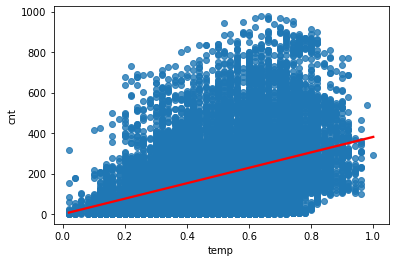

In [54]:
sns.regplot(data=hour,x="temp",y="cnt",line_kws={"color": "red"})
plt.show()

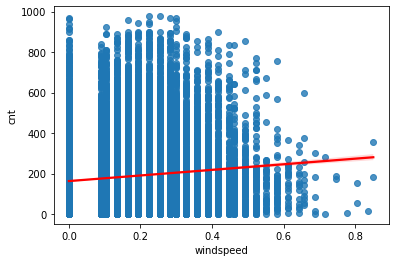

In [55]:
sns.regplot(data=hour,x="windspeed",y="cnt",line_kws={"color": "red"})
plt.show()

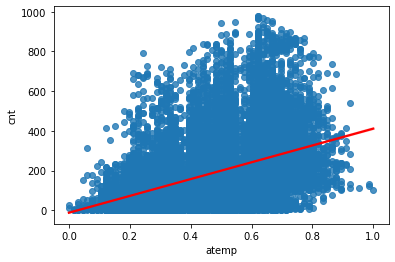

In [56]:
sns.regplot(data=hour,x="atemp",y="cnt",line_kws={"color": "red"})
plt.show()

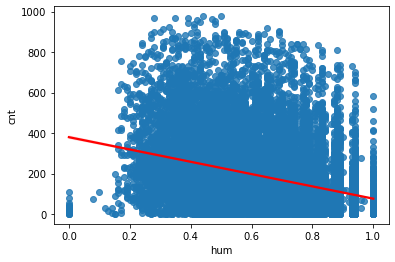

In [57]:
sns.regplot(data=hour,x="hum",y="cnt",line_kws={"color": "red"})
plt.show()

MACHINE LEARNING


SPLITING

In [58]:
hour.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        17379 non-null  int64         
 1   dteday         17379 non-null  datetime64[ns]
 2   season         17379 non-null  int64         
 3   yr             17379 non-null  int64         
 4   mnth           17379 non-null  int64         
 5   hr             17379 non-null  int64         
 6   holiday        17379 non-null  int64         
 7   weekday        17379 non-null  int64         
 8   workingday     17379 non-null  int64         
 9   weathersit     17379 non-null  int64         
 10  temp           17379 non-null  float64       
 11  atemp          17379 non-null  float64       
 12  hum            17379 non-null  float64       
 13  windspeed      17379 non-null  float64       
 14  casual         17379 non-null  int64         
 15  registered     1737

In [59]:
X=hour[["yr","mnth","hr","holiday","weekday","workingday","weathersit","temp","hum","windspeed"]]#input
y=hour["registered"] #target

print(y.shape)
print(X.shape)

(17379,)
(17379, 10)


In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13903, 10)
(3476, 10)
(13903,)
(3476,)


NORMALISATION

In [61]:
# fit scaler on training data
norm=MinMaxScaler().fit(X_train)
# transform training data
X_train_norm=norm.transform(X_train)
# transform testing data
X_test_norm=norm.transform(X_test)

PREDICTING

In [63]:
#with sklearn
lr=LinearRegression()
lr.fit(X_train_norm,y_train)
pred_lr=lr.predict(X_test_norm)

In [76]:
#with statsmodels
X_train_norm_new=sm.add_constant(X_train_norm)
X_test_norm_new=sm.add_constant(X_test_norm)
model1=sm.OLS(y_test,X_test_norm_new).fit()
y_predicted=model1.predict(X_test_norm_new)

EVALUATION

In [77]:
model1_summary=model1.summary()
print(model1_summary)

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     180.4
Date:                Thu, 17 Nov 2022   Prob (F-statistic):          2.05e-306
Time:                        15:17:46   Log-Likelihood:                -21675.
No. Observations:                3476   AIC:                         4.337e+04
Df Residuals:                    3465   BIC:                         4.344e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.1011     13.322     -2.635      0.0

In [78]:
# compute the vif for all given features


# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def compute_vif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF_value'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    vif['VIF_value'] = round(vif['VIF_value'], 2)
    vif = vif.sort_values(by = "VIF_value", ascending = False)
    
    return(vif)

In [79]:
compute_vif(X)

,Features,VIF_value
8,hum,11.24
6,weathersit,7.59
7,temp,7.19
1,mnth,4.91
2,hr,3.75
5,workingday,3.22
9,windspeed,3.21
4,weekday,3.06
0,yr,1.94
3,holiday,1.10


In [80]:
hour.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,casual,registered,cnt,tem_cel,atemp_cel,windspeed_,hum_score,temp_score,wind_score,weather_score
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,...,0.158295,0.282046,0.278379,0.136983,0.136152,-0.074500,0.013389,-0.102185,-0.069421,-0.084812
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,...,0.120206,0.174226,0.178056,0.310767,0.311882,-0.149175,0.142832,-0.195791,-0.130302,-0.076385
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,...,0.142779,0.253684,0.250495,0.041823,0.040762,-0.009013,-0.071834,-0.036735,-0.011882,-0.086349
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,...,0.068457,0.122273,0.120638,0.201549,0.201941,-0.134889,0.151760,-0.140048,-0.119703,-0.019147
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,...,0.301202,0.374141,0.394071,0.135884,0.137677,0.137063,-0.273931,0.026181,0.127176,-0.160087
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,...,0.031564,-0.047345,-0.030927,-0.027483,-0.027358,0.004288,-0.020475,0.047289,0.005485,0.019377
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,...,0.032721,0.021578,0.026900,-0.001283,-0.001505,0.010666,-0.038018,0.023041,0.009787,-0.006247
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,...,-0.300942,0.134326,0.030284,0.055791,0.055376,-0.011526,0.020974,-0.045144,-0.007355,-0.010259
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,...,-0.152628,-0.120966,-0.142426,-0.102014,-0.103280,0.026441,0.393871,-0.064747,0.015941,0.492434
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,...,0.459616,0.335361,0.404772,0.999438,0.999749,-0.023534,-0.045062,-0.370208,-0.018552,-0.355300


In [81]:
y_test.shape

(3476,)

In [82]:
y_predicted.shape

(3476,)

In [85]:

#Mean Square Error(MSE)/Root Mean Square Error(RMSE)
print("MSE",mean_squared_error(y_test,y_predicted ))
print("RMSE",math.sqrt(mean_squared_error(y_test, y_predicted)))

MSE 15261.182249018155
RMSE 123.53615765846918


In [84]:
#Mean Absolute Error(MAE)

print("MAE",mean_absolute_error(y_test, y_predicted))


MAE 89.87957717180232
